In [ ]:
<a href="https://colab.research.google.com/gith/adview_prediction/blob/main/youtube_adview_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training the best model - using train.csv

Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt

Import the dataset

In [2]:
data_train = pd.read_csv("train.csv")
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


Check shape

In [3]:
#returns the n*n dimensions of the dataset
data_train.shape

(14999, 9)

Check datatypes

In [4]:
data_train.dtypes

vidid        object
adview        int64
views        object
likes        object
dislikes     object
comment      object
published    object
duration     object
category     object
dtype: object

In [5]:
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(category)
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


Clean the dataset by removing missing values and other things.



In [14]:
# Removing character "F" present in data
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,NaN
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,NaN
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,NaN
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,NaN
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,NaN


In [15]:
#many coloumns are removed so the nummber from 14999 becomes 14637
data_train.shape

(14637, 9)

In [16]:
data_train.dtypes

vidid         object
adview         int64
views         object
likes         object
dislikes      object
comment       object
published     object
duration      object
category     float64
dtype: object

Transform attributes into numerical values and other
necessary transformations.

In [18]:
# Convert values to integers(type conversion) for views, likes, comments, dislikes and adview
data_train["views"] = pd.to_numeric(data_train["views"])
data_train["comment"] = pd.to_numeric(data_train["comment"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
data_train["adview"]=pd.to_numeric(data_train["adview"])

In [19]:
#extracts the values from the 'vidid' column of the data_train
column_vidid=data_train['vidid']

In [20]:
# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,NaN
1,2741,2,1707,56,2,6,2185,3040,NaN
2,8138,1,2023,25,0,2,2094,1863,NaN
3,9005,6,620860,777,161,153,2119,2546,NaN
4,122,1,666,1,0,0,2091,1963,NaN


In [ ]:
dat_train.drop()

In [21]:
# Convert Time_in_sec for duration
import datetime
import time

def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp
train=pd.read_csv("train.csv")
mp = pd.read_csv("train.csv")["duration"]
time = mp.apply(checki)
def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)
time1=time.apply(func_sec)
data_train["duration"]=time1
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,NaN
1,2741,2,1707,56,2,6,2185,570,NaN
2,8138,1,2023,25,0,2,2094,136,NaN
3,9005,6,620860,777,161,153,2119,262,NaN
4,122,1,666,1,0,0,2091,31,NaN


Visualize the dataset

In [31]:
data_train = data_train.dropna(subset=["category"])

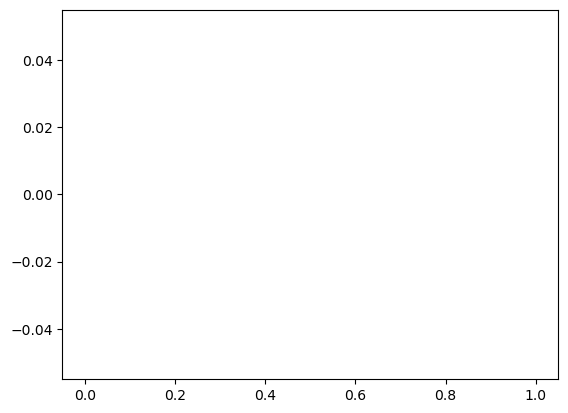

KeyError: 'adview'

In [38]:
# Visualization
# Individual Plots
plt.hist(data_train["category"])
plt.show()
plt.plot(data_train["adview"])
plt.show()
# Remove videos with adview greater than 2000000 as outlier
data_train = data_train[data_train["adview"] <2000000]

C:\Users\konas\AppData\Local\Temp\ipykernel_20408\1077671707.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
C:\Users\konas\anaconda3\lib\site-packages\seaborn\matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\konas\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


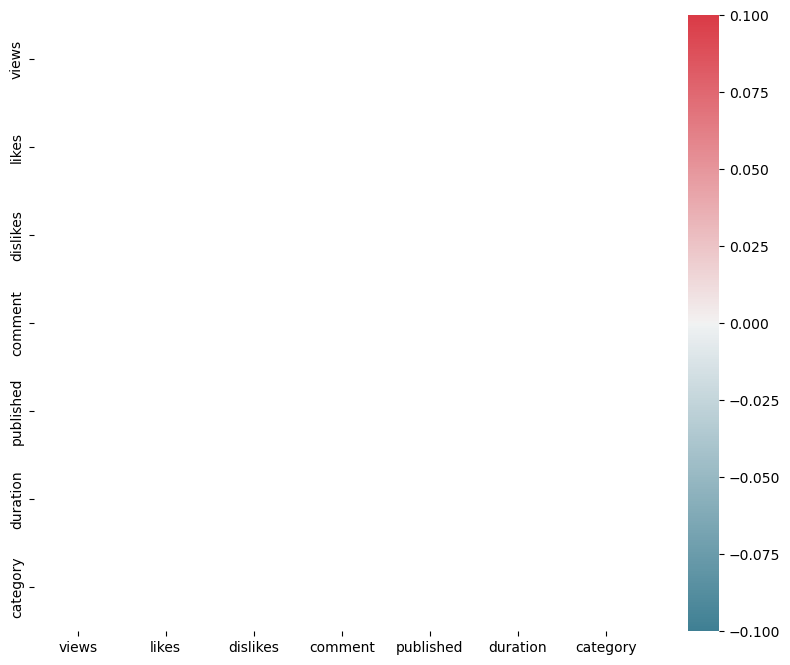

In [39]:
# Heatmap
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = data_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
square=True, ax=ax,annot=True)
plt.show()

Split the data

In [40]:
# Split Data
Y_train = pd.DataFrame(data = data_train.iloc[:, 1].values, columns = ['target'])
data_train=data_train.drop(["adview"],axis=1)
data_train=data_train.drop(["vidid"],axis=1)
data_train.head()

KeyError: "['adview'] not found in axis"

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

Normalize the data

In [42]:
# Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train.mean()

NameError: name 'X_train' is not defined

In [43]:
from sklearn import metrics
def print_error(X_test, y_test, model_name):
  prediction = model_name.predict(X_test)
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

Use linear regression, Support Vector Regressor for training and get
errors.

In [44]:
# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)

NameError: name 'X_train' is not defined

In [45]:
# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test, linear_regression)

NameError: name 'X_train' is not defined

Use Decision Tree Regressor and Random Forest Regressors.

In [46]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)

NameError: name 'X_train' is not defined

In [47]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)

NameError: name 'X_train' is not defined

In [48]:
pip install tensorflow


  Using cached tensorflow-2.12.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.12.0-cp39-cp39-win_amd64.whl (272.8 MB)
     --------------------------------------- 14.7/14.7 MB 26.2 MB/s eta 0:00:00
     ------------------------------------- 440.7/440.7 kB 26.9 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 7.3 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB ? eta 0:00:00
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     ---------------------------------------- 1.7/1.7 MB 27.4 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 42.0 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'don

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.23.5 which is incompatible.


Build an artificial neural network and train it with different layers
and hyperparameters.

In [49]:
# Artificial Neural Network
import tensorflow 
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense
ann = keras.models.Sequential([
Dense(6, activation="relu",
input_shape=X_train.shape[1:]),
Dense(6,activation="relu"),
Dense(1)
])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])
history=ann.fit(X_train,y_train,epochs=100)
ann.summary()
print_error(X_test,y_test,ann)

RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

Pick the best model based on errors as well as generalisation, save your model and predict on the test set.

In [ ]:
#Saving Scikitlearn models
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")
# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")

In [ ]:
import joblib
classifer = joblib.load("decisiontree_youtubeadview.pkl")

In [ ]:
prediction = classifer.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

# Prediction of ‘adview’ for the test.csv 

Import the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm

Import the dataset

In [ ]:
#loading the data
df = pd.read_csv('test.csv');
df.head()

In [ ]:
#mapping category feature to numbers
category = {'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}

#transforming category
df['category'] = df['category'].map(category)
df.head()

Check shape

In [ ]:
df.shape

Clean the dataset by removing missing values and other things.

In [ ]:
# removing F from likes, dislikes, views, comments and adviews
df = df[df.views != 'F']
df = df[df.comment != 'F']
df = df[df.dislikes != 'F']
df = df[df.likes != 'F']

Check shape

In [ ]:
#rows with F in views, likes, dislikes and comment is removed
df.shape

Check datatype

In [ ]:
df.dtypes
# as we can see likes, views etc has object dtypes. So, need to covert to numeric

Transform attributes into numerical values and other
necessary transformations.

In [ ]:
df['views'] = pd.to_numeric(df['views'])
df['comment'] = pd.to_numeric(df['comment'])
df['likes'] = pd.to_numeric(df['likes'])
df['dislikes'] = pd.to_numeric(df['dislikes'])

In [ ]:
# storing vidid column in another variable for further use
col_vidid = df['vidid']

In [ ]:
# performing encoding on vivid, duration and published
from sklearn.preprocessing import LabelEncoder
df['published'] = LabelEncoder().fit_transform(df['published'])
df['vidid'] = LabelEncoder().fit_transform(df['vidid'])
df['duration'] = LabelEncoder().fit_transform(df['duration'])
df.head()

In [ ]:
# Convert Time_in_sec for duration
import datetime
import time
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp
train=pd.read_csv("test.csv")
mp = pd.read_csv("test.csv")["duration"]
time = mp.apply(checki)

def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

df["duration"]=time1
df.head()

In [ ]:
df = df.drop(['vidid'],axis=1)
df.head()

Predict ‘adview’ , save the column in predictions.csv file

In [ ]:
import joblib
classifer = joblib.load("decisiontree_youtubeadview.pkl")
prediction = classifer.predict(df)

In [ ]:
prediction

In [ ]:
#saving prediction as csv file
np.savetxt('Predictions_Submission.csv',prediction,delimiter=',')